<a href="https://colab.research.google.com/github/limpa105/ANN-from-scratch-python/blob/main/Pytorch_SequentialvsNested.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [48]:
import torch
import torchvision
from torch.utils import data
from torchvision import transforms
from torch import nn

import matplotlib.pyplot as plt 
import numpy as np

In [ ]:
# Main Goal: Learn more about Pytorch 
# Research Question #1: Can I implement a very simple pytorch neural network with three linear layers that uses 
# both sequential and custom created nested architecture and succesfully learns paters in the 
# Fashion minst data ?

In [2]:
# Function to load fashion minst data 
def load_fashion_mnist(batch_size: int = 512, num_workers: int = 4):
    data_transform = transforms.ToTensor() # Obtaining data to tensor converter
    
    # Downloading data
    mnist_train = torchvision.datasets.FashionMNIST(root = "../data", train = True, transform = data_transform, download= True)  # Defining fashion MNIST train from torch datasets
    mnist_test = torchvision.datasets.FashionMNIST(root = "../data", train = False, transform = data_transform, download = True)
    
    # Loading data onto an iterator
    train_data_loader = data.DataLoader(mnist_train, batch_size, shuffle = True, num_workers = 4)
    test_data_loader = data.DataLoader(mnist_test, batch_size, shuffle = True, num_workers = 4)
    
    # Returning iterator
    return train_data_loader, test_data_loader

In [3]:
train_iter, test_iter = load_fashion_mnist()

/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)
/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid poten

In [4]:
# one way to implement a neural network
neural_network = torch.nn.Sequential(torch.nn.Flatten(), 
                            torch.nn.Linear(784, 196), 
                            torch.nn.Sigmoid(),
                            torch.nn.Dropout(0.1),
                            torch.nn.Linear(196,49),
                            torch.nn.Sigmoid(),
                            torch.nn.Dropout(0.3),
                            torch.nn.Linear(49,10),
                            torch.nn.Softmax())

In [5]:
# Defining a trainer
trainer = torch.optim.Adam(neural_network.parameters(),weight_decay= 0.00001, lr = 0.001)
loss = torch.nn.CrossEntropyLoss()

In [6]:
def init_weights_biases(layer: torch.nn):
    # Linear is the only layer wirh weights as others are drop out and activation 
    # functions
    if isinstance(layer, torch.nn.Linear):
      # Weights picked from normal distribution by random 
      # _ automatically allows for grad
        torch.nn.init.normal_(layer.weight, mean = 0, std = 0.1) 
        torch.nn.init.zeros_(layer.bias)   

neural_network.apply(init_weights_biases) # Autoinitialize any linear weights with normal inputs

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=784, out_features=196, bias=True)
  (2): Sigmoid()
  (3): Dropout(p=0.1, inplace=False)
  (4): Linear(in_features=196, out_features=49, bias=True)
  (5): Sigmoid()
  (6): Dropout(p=0.3, inplace=False)
  (7): Linear(in_features=49, out_features=10, bias=True)
  (8): Softmax(dim=None)
)

In [10]:
print(neural_network[7].weight.data[0])
print(neural_network[7].bias.data[0])

tensor([-0.4871, -0.4730, -0.5370, -0.1373,  0.3936, -0.4183, -0.3490, -0.4284,
        -0.1007,  0.2498,  0.3874,  0.3715,  0.2142, -0.5159, -0.2314, -0.3498,
        -0.3717,  0.3227,  0.3721,  0.4309,  0.3960,  0.3070, -0.3435,  0.4418,
         0.4499, -0.4788, -0.2172,  0.3336,  0.3968,  0.3722,  0.2015, -0.3938,
        -0.3583, -0.3152, -0.4644,  0.4404,  0.2873,  0.3441, -0.3815, -0.3617,
        -0.2917, -0.4279,  0.4304,  0.3559, -0.3837,  0.3245,  0.4286, -0.3525,
         0.4385])
tensor(-0.0099)


In [24]:
num_epochs = 10
neural_network.train()
for epoch in range(num_epochs):
    for data_point, label_point in train_iter: # Traversing data loader
        trainer.zero_grad() # Starting by resetting gradient of trainer
        cost = loss(neural_network(data_point), label_point) # Computing cost
        cost.backward() # Backwards propagating
        trainer.step() # performing step
    print(f'The loss for epoch {epoch} is {cost.sum()}')

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
/usr/local/lib/python3.7/dist-packages/torch/nn/modules/container.py:139: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


The loss for epoch 0 is 1.6968698501586914
The loss for epoch 1 is 1.6428083181381226
The loss for epoch 2 is 1.7424696683883667
The loss for epoch 3 is 1.7007699012756348
The loss for epoch 4 is 1.5984997749328613
The loss for epoch 5 is 1.599530577659607
The loss for epoch 6 is 1.6011695861816406
The loss for epoch 7 is 1.595845341682434
The loss for epoch 8 is 1.5931254625320435
The loss for epoch 9 is 1.6245924234390259


In [11]:
#making sure the weights and biases were changed by the model 
print(neural_network[7].weight.data[0])
print(neural_network[7].bias.data[0])

tensor([-0.4871, -0.4730, -0.5370, -0.1373,  0.3936, -0.4183, -0.3490, -0.4284,
        -0.1007,  0.2498,  0.3874,  0.3715,  0.2142, -0.5159, -0.2314, -0.3498,
        -0.3717,  0.3227,  0.3721,  0.4309,  0.3960,  0.3070, -0.3435,  0.4418,
         0.4499, -0.4788, -0.2172,  0.3336,  0.3968,  0.3722,  0.2015, -0.3938,
        -0.3583, -0.3152, -0.4644,  0.4404,  0.2873,  0.3441, -0.3815, -0.3617,
        -0.2917, -0.4279,  0.4304,  0.3559, -0.3837,  0.3245,  0.4286, -0.3525,
         0.4385])
tensor(-0.0099)


In [29]:
# Lets try nesting some archiecture and see if we can make the dimensions align and 
# results make sense
class Net(nn.Module):
  def __init__(self):
    super().__init__()
    self.one = torch.nn.Sequential(torch.nn.Flatten(), 
                            torch.nn.Linear(784, 196), 
                            torch.nn.Sigmoid(),
                            torch.nn.Dropout(0.2))
    self.two = torch.nn.Linear(196,49)

  def forward(self, X):
    return self.two(self.one(X))

In [30]:
second_network = nn.Sequential(Net(), nn.Dropout(0.3),nn.Sigmoid(), nn.Linear(49,10), nn.Softmax())
second_trainer = torch.optim.Adam(second_network.parameters(),weight_decay= 0.00001, lr = 0.001)
second_network.apply(init_weights_biases)

num_epochs = 10
neural_network.train()
for epoch in range(num_epochs):
    for data_point, label_point in train_iter: # Traversing data loader
        second_trainer.zero_grad() # Starting by resetting gradient of trainer
        cost = loss(second_network(data_point), label_point) # Computing cost
        cost.backward() # Backwards propagating
        second_trainer.step() # performing step
    print(f'The loss for epoch {epoch} is {cost.sum()}')

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
/usr/local/lib/python3.7/dist-packages/torch/nn/modules/container.py:139: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


The loss for epoch 0 is 2.017996311187744
The loss for epoch 1 is 1.8924640417099
The loss for epoch 2 is 1.8067398071289062
The loss for epoch 3 is 1.7174171209335327
The loss for epoch 4 is 1.7138175964355469
The loss for epoch 5 is 1.7823234796524048
The loss for epoch 6 is 1.7235075235366821
The loss for epoch 7 is 1.646540641784668
The loss for epoch 8 is 1.670068383216858
The loss for epoch 9 is 1.6064082384109497


In [27]:
print(second_network)

Sequential(
  (0): Net(
    (one): Sequential(
      (0): Flatten(start_dim=1, end_dim=-1)
      (1): Linear(in_features=784, out_features=196, bias=True)
      (2): Sigmoid()
    )
    (two): Linear(in_features=196, out_features=49, bias=True)
  )
  (1): Sigmoid()
  (2): Linear(in_features=49, out_features=10, bias=True)
  (3): Softmax(dim=None)
)


In [23]:
# Check if 
print(sum(p.numel() for p in neural_network.parameters() if p.requires_grad))
print(sum(p.numel() for p in second_network.parameters() if p.requires_grad))

164013
164013


In [33]:
images, labels = iter(train_iter).next()

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


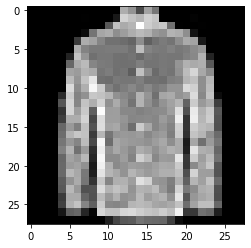

In [44]:
plt.imshow(images[11].squeeze(), cmap='gray')

In [81]:
neural_network.eval()
print(np.argmax(neural_network(images[11]).data))
second_network.eval()
print(np.argmax(second_network(images[11]).data))
print(labels[11])

tensor(3)
tensor(4)
tensor(6)


/usr/local/lib/python3.7/dist-packages/torch/nn/modules/container.py:139: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


In [ ]:
#Conclusion: Neither of the Models has the best accuracy on the Fashion Minst Data most likely due to the 
# very simple architecture but the loss goes down for both and they have the same number of trainable paremters
# Future Steps: Implement more complicated architecture similar to Convolution Layers!